<h1 style="text-align: center;">Images</h1>

Импортируем необходимые библиотеки. 
Если PIL не установлена, то **pip install pillow**

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Открываем изображение и меняем его размер на 512x512 пикселей 

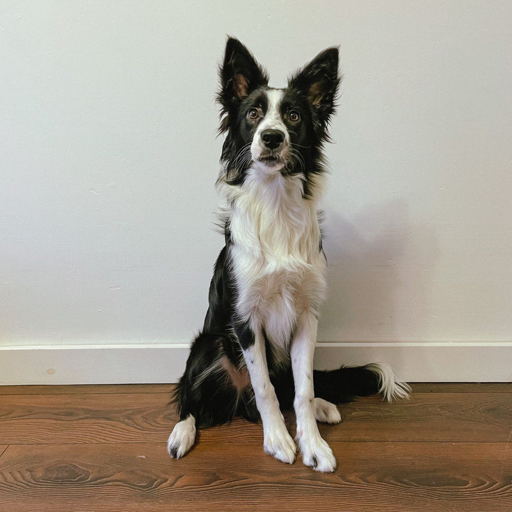

In [2]:
image_RGB = Image.open('ulm.jpg')
image_RGB = image_RGB.resize((512, 512))
image_RGB


Переведём изображение в матрицу и проверим её размерность. 
Ожидаем (512 пикселей в ширину)х(512 пикселей в высоту)х(3 значения RGB в каждом пикселе)

In [3]:
matr_RGB = np.array(image_RGB)
print(np.shape(matr_RGB))

(512, 512, 3)


Отобразим значения "красной", "зелёной" и "синей" матриц

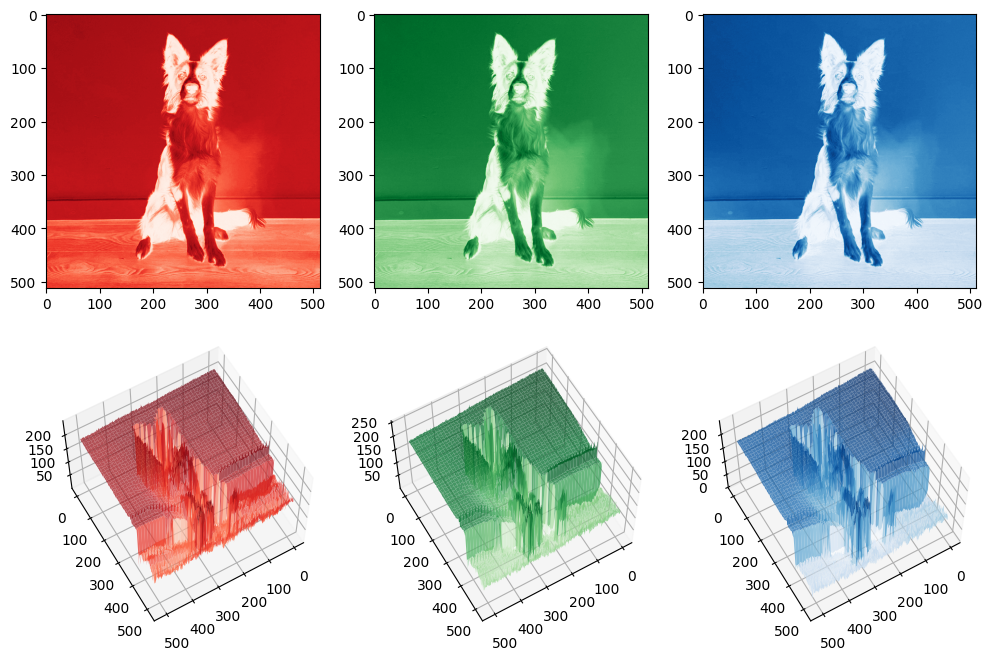

In [4]:
x = np.arange(0, matr_RGB.shape[0])
y = np.arange(0,  matr_RGB.shape[1])
x, y = np.meshgrid(x, y)

z_R = matr_RGB[:, :, 0]
z_G = matr_RGB[:, :, 1]
z_B = matr_RGB[:, :, 2]

fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(231)
ax.imshow(z_R, cmap='Reds')

ax = fig.add_subplot(232)
ax.imshow(z_G, cmap='Greens')

ax = fig.add_subplot(233)
ax.imshow(z_B, cmap='Blues')

ax = fig.add_subplot(234, projection='3d')
ax.plot_surface(x, y, z_R, alpha=0.7, cmap='Reds')
ax.view_init(60, 60)

ax = fig.add_subplot(235, projection='3d')
ax.plot_surface(x, y, z_G, alpha=0.75, cmap='Greens')
ax.view_init(60, 60)

ax = fig.add_subplot(236, projection='3d')
ax.plot_surface(x, y, z_B, alpha=0.75, cmap='Blues')

ax.view_init(60, 60)

plt.show()

Для простоты обработки переведём изображение из RGB в "оттенки серого"

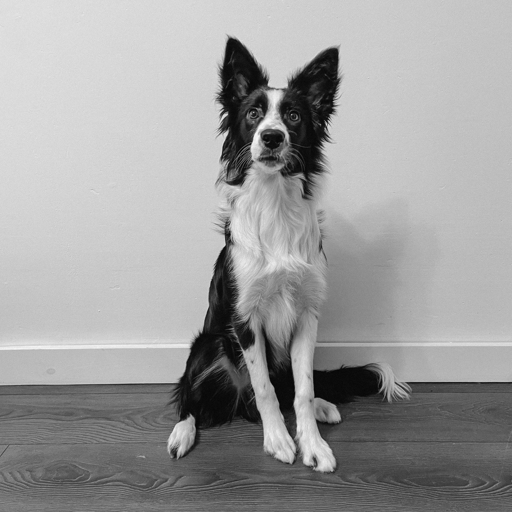

In [5]:
image_L = image_RGB.convert('L')
image_L

Переведём полученное изображение в матрицу и посмотрим на её размерность

In [6]:
matr_L = np.array(image_L)
print(np.shape(matr_L))

(512, 512)


Вычисляем производные по направлению

In [7]:
grad_z = np.gradient(matr_L)
dzdi = np.abs(grad_z[0])
dzdj = np.abs(grad_z[1])
matr_dz = (dzdi**2+dzdj**2)**0.5

Фильтруем матрицу производных по уровню threshold = 10

In [8]:
threshold = 10
dzdi_threshold = np.where(dzdi < threshold, 255, 0)
dzdj_threshold = np.where(dzdj < threshold, 255, 0)
matr_threshold = np.where(matr_dz < threshold, 255, 0)


Отобразим матрицы производных

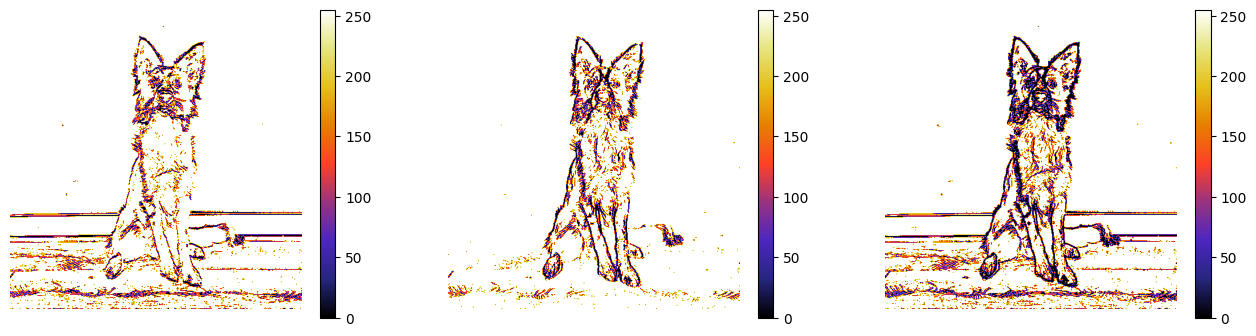

In [9]:
plt.figure(figsize=(16, 4))

plt.subplot(131)
plt.imshow(dzdi_threshold, cmap='CMRmap')
plt.colorbar()
plt.axis('off')

plt.subplot(132)
plt.imshow(dzdj_threshold, cmap='CMRmap')
plt.colorbar()
plt.axis('off')

plt.subplot(133)
plt.imshow(matr_threshold, cmap='CMRmap')
plt.colorbar()
plt.axis('off')

plt.show()

Конвертируем матрицу в изображение и выведем с оригинальной картинкой

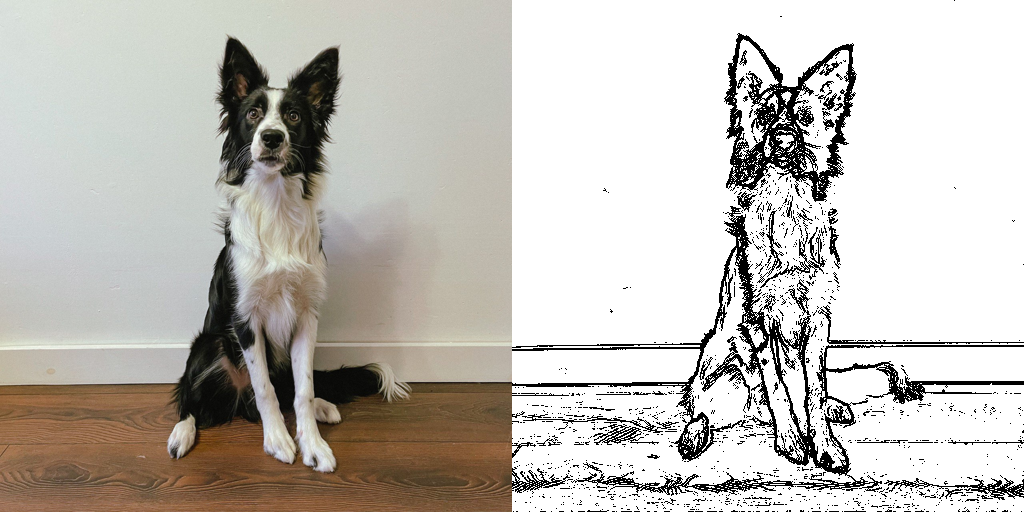

In [10]:
image_matr_threshold = Image.fromarray(matr_threshold).convert('L')

new_image = Image.new(
    'RGB', (2*image_RGB.size[0], image_RGB.size[1]), (255, 255, 255))
new_image.paste(image_RGB, (0, 0))
new_image.paste(image_matr_threshold, (image_RGB.size[0], 0))

new_image